In [ ]:
!pip install opendatasets
!pip install pandas
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine as ce
from sqlalchemy import inspect
from pathlib import Path
import opendatasets as od
import pandas
import kagglehub
import os

In [ ]:
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
path = kagglehub.dataset_download("raynardj/classic-english-literature-corpus")

100%|██████████| 160M/160M [00:02<00:00, 80.7MB/s]

Extracting files...


In [ ]:
!ls /root/.cache/kagglehub/datasets/raynardj/classic-english-literature-corpus/versions/1

books.db


In [ ]:

engine = ce("sqlite:///" + path + "/books.db")
inspector = inspect(engine)

print(inspector.get_table_names())


['authors', 'book_file', 'book_original', 'books', 'text_files']


In [ ]:
books_df = pd.read_sql("books", con = engine)
author_df = pd.read_sql("authors", con = engine)
book_file_df = pd.read_sql("book_file", con = engine)
text_file_df = pd.read_sql("text_files", con = engine)
booke_original = pd.read_sql("book_original", con = engine)

In [ ]:
# Step 2: Get the top 50 oldest authors
oldest_authors = author_df.sort_values(by="born").head(20)

oldest_authors[['author']]

,author
187,Marcus Annaeus Lucanus
268,Virgil
25,Aristotle
24,Aristophanes
127,Hippocrates
81,Euripides
243,Sophocles
2,Aeschylus
209,Omar Khayam
52,Dante Alighieri


In [ ]:
author_book_df = pd.merge(books_df, oldest_authors, left_on='author_id', right_on='index', how='inner')


merged_df = pd.merge(author_book_df, book_file_df, on='book_id', how='inner')

file_list = merged_df['file_id'].tolist()

text_file_df.iloc[file_list].head()

,index,fmt,text
247,247,txt,1609\n\n...
271,271,txt,\n\n\n\n\n\n\n\n\n\n\n\n ...
63,63,txt,\n\n\n\n\n\n\n\n ...
49,49,txt,\n\n\n\n\n\n ...
87,87,txt,\n\n\n\n\n\n ...


In [ ]:
!pip install requests beautifulsoup4
!pip install datasets

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
from huggingface_hub import hf_hub_download
import datasets
import json
import requests
from bs4 import BeautifulSoup

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-12-09 20:14:16--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.08s   

2024-12-09 20:14:17 (13.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
result = []

In [ ]:
MAX_INPUT_LENGTH = 200

In [ ]:
import re

with open('input.txt', 'r') as file:
    text = file.read()

lines = text.split("\n\n")

for line in lines:
    remove_character = " ".join(line.split('\n')[1:])
    if len(remove_character) > MAX_INPUT_LENGTH:
      sentences = re.split(r'(?<=[.!?;:])', remove_character)
      current_sentence = ""
      current_length = 0

      for sentence in sentences:
        if len(sentence) > MAX_INPUT_LENGTH:
          continue
        if current_length + len(sentence) > MAX_INPUT_LENGTH:
          result.append(current_sentence.strip())
          current_sentence = ""
          current_length = 0

        current_sentence += sentence
        current_length += len(sentence)

      if current_sentence:
        result.append(current_sentence.strip())
    else:
      result.append(remove_character.strip())

print("Appended Shakespeare to Result")
print(f"Length of result: {len(result)}")

Appended Shakespeare to Result
Length of result: 9938


In [ ]:
result

['Before we proceed any further, hear me speak.',
 'Speak, speak.',
 'You are all resolved rather to die than to famish?',
 'Resolved. resolved.',
 'First, you know Caius Marcius is chief enemy to the people.',
 "We know't, we know't.",
 "Let us kill him, and we'll have corn at our own price. Is't a verdict?",
 "No more talking on't; let it be done: away, away!",
 'One word, good citizens.',
 'We are accounted poor citizens, the patricians good. What authority surfeits on would relieve us:',
 'if they would yield us but the superfluity, while it were wholesome, we might guess they relieved us humanely; but they think we are too dear:',
 'the leanness that afflicts us, the object of our misery, is as an inventory to particularise their abundance; our sufferance is a gain to them Let us revenge this with our pikes, ere we become rakes:',
 'for the gods know I speak this in hunger for bread, not in thirst for revenge.',
 'Would you proceed especially against Caius Marcius?',
 "Against him

In [ ]:
'''
Pull good examples from existing quality datasets
'''

dataset = datasets.load_dataset("MLBtrio/genz-slang-dataset")

result.extend(dataset['train']['Example'][0:123])

print("Appended existing quality datasets")
print(f"Length of result: {len(result)}")

Appended existing quality datasets
Length of result: 7220


In [ ]:
a = "This last old man, Whom with a crack'd heart I have sent to Rome, Loved me above the measure of a father; Nay, godded me, indeed. Their latest refuge Was to send him; for whose old love I have, Though I show'd sourly to him, once more offer'd The first conditions, which they did refuse And cannot now accept; to grace him only That thought he could do more, a very little I have yielded to: fresh embassies and suits, Nor from the state nor private friends, hereafter Will I lend ear to. Ha! what shout is this?"

len(a)

512

In [ ]:
'''
Scrape Online Slang Dictionary
'''

base_url = "http://onlineslangdictionary.com"

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

def get_total_pages_for_letter(letter):
    url = f"{base_url}/browse/{letter}"
    print(f"Fetching: {url}")

    # Fetch the first page of the letter
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Look for the pagination controls (e.g., last page link)
        pagination = soup.find('table', class_='nav inner')
        if pagination:
            # Find the last page number in the pagination
            last_page_link = pagination.find_all('a')[-1].get('href')
            last_page_number = int(last_page_link.split('page')[-1])
            return last_page_number
    else:
        print(f"Failed to retrieve the page: {url}")
        return 0


def browse_pages(letter):
    total_pages = get_total_pages_for_letter(letter)
    if total_pages == 0:
        print(f"No pages found for letter {letter}")
        return

    # Loop through the pages for this letter
    for page_num in range(1, total_pages + 1):
        # Construct the URL for the current page
        url = f"{base_url}/browse/{letter}/page{page_num}"
        print(f"Fetching: {url}")

        # Fetch the page content
        response = requests.get(url)
        if response.status_code == 200:
            # Parse the page using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            quote_boxes = soup.find_all('blockquote')
            for quote_box in quote_boxes:
              quote = quote_box.get_text(separator=" ", strip=True)
              if "Citation" not in quote and "http" not in quote and 2 <= len(quote) <= 400:
                if quote[-2] == " ":
                  quote = quote[:-2] + quote[-1]
                result.append(quote)
        else:
            print(f"Failed to retrieve the page: {url}")

for letter in letters:
    print(f"Starting with letter: {letter}")
    browse_pages(letter)
    print(f"Completed letter: {letter}")
    print(f"Length of Result: {len(result)}")

Starting with letter: a
Fetching: http://onlineslangdictionary.com/browse/a
Fetching: http://onlineslangdictionary.com/browse/a/page1
Fetching: http://onlineslangdictionary.com/browse/a/page2
Fetching: http://onlineslangdictionary.com/browse/a/page3
Fetching: http://onlineslangdictionary.com/browse/a/page4
Fetching: http://onlineslangdictionary.com/browse/a/page5
Fetching: http://onlineslangdictionary.com/browse/a/page6
Fetching: http://onlineslangdictionary.com/browse/a/page7
Fetching: http://onlineslangdictionary.com/browse/a/page8
Fetching: http://onlineslangdictionary.com/browse/a/page9
Fetching: http://onlineslangdictionary.com/browse/a/page10
Fetching: http://onlineslangdictionary.com/browse/a/page11
Fetching: http://onlineslangdictionary.com/browse/a/page12
Fetching: http://onlineslangdictionary.com/browse/a/page13
Fetching: http://onlineslangdictionary.com/browse/a/page14
Fetching: http://onlineslangdictionary.com/browse/a/page15
Fetching: http://onlineslangdictionary.com/brows

In [ ]:
import re

final_result = []

MAX_INPUT_LENGTH = 200

for slang_line in result:
    space_split = [s for s in slang_line.split(" ") if s.strip()]
    num_breaks = len(space_split)
    first_half = space_split[:num_breaks//2]
    second_half = space_split[num_breaks//2:]

    first_string = " ".join(first_half)
    second_string = " ".join(second_half)

    final_result.append((first_string, second_string))

print("Appended Slang to Result")
print(f"Length of final_result: {len(final_result)}")

Appended Slang to Result
Length of final_result: 31594


In [ ]:
final_result

In [ ]:
result[:25]

['Before we proceed any further, hear me speak.',
 'Speak, speak.',
 'You are all resolved rather to die than to famish?',
 'Resolved. resolved.',
 'First, you know Caius Marcius is chief enemy to the people.',
 "We know't, we know't.",
 "Let us kill him, and we'll have corn at our own price. Is't a verdict?",
 "No more talking on't; let it be done: away, away!",
 'One word, good citizens.',
 'We are accounted poor citizens, the patricians good. What authority surfeits on would relieve us:',
 'if they would yield us but the superfluity, while it were wholesome, we might guess they relieved us humanely; but they think we are too dear:',
 'the leanness that afflicts us, the object of our misery, is as an inventory to particularise their abundance; our sufferance is a gain to them Let us revenge this with our pikes, ere we become rakes:',
 'for the gods know I speak this in hunger for bread, not in thirst for revenge.',
 'Would you proceed especially against Caius Marcius?',
 "Against him

In [ ]:
final_result = ["The man was standing at the edge of the",
"I think it might be a good idea to",
"To see her again after all this time was",
"You should know by now that I can't",
"A little bit of good can make a big",
"That is something I have been meaning to",
"My day has been going better since I",
"Is there any chance that we could",
"He had been waiting for this moment to",
"Of all the things we could have done, this"]

'''
Save data to local json_lines file
'''

input_arr = [{"src": k, "trg": "WHATEVER THE MODEL WANTS"} for k in final_result]

file_path = 'slang_real.jsonl'

# Open the file in write mode
with open(file_path, 'w') as f:
    for entry in input_arr:
        # Write each item as a JSON object on a new line
        json.dump(entry, f)
        f.write('\n')

print(f'JSONL file saved to {file_path}')



JSONL file saved to slang_real.jsonl


In [ ]:
'''
Load Result Variable (for consistent results)
'''

NUM_SHAKESPEARE = 7097

import pickle

# Load the uploaded pickle file
with open('result.pkl', 'rb') as f:
    old_results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'result.pkl'

In [ ]:
slang = old_results[]

SyntaxError: invalid syntax (<ipython-input-22-c648c6e97c94>, line 1)

In [ ]:
shakespeare_lines = result


shakespeare_pairs = zip(shakespeare_lines, shakespeare_lines[1:])

0


In [ ]:
'''Analysis'''

import string
import matplotlib.pyplot as plt

NUM_SHAKESPEARE = 7097

shakespeare_lines = result[:7097]

slang_lines = result[7097:]

def make_word_list(test_string):
  return [word.strip(string.punctuation) for word in test_string.split() if word.strip(string.punctuation).isalnum()]

shakespeare_words = {}
shakespeare_set = set()

for line in shakespeare_lines:
  words_in_line = make_word_list(line)
  for word in words_in_line:
    shakespeare_set.add(word)
    if word not in shakespeare_words:
      shakespeare_words[word] = 1
    else:
      shakespeare_words[word] += 1

slang_words = {}
slang_set = set()

for line in slang_lines:
  words_in_line = make_word_list(line)
  for word in words_in_line:
    slang_set.add(word)
    if word not in slang_words:
      slang_words[word] = 1
    else:
      slang_words[word] += 1



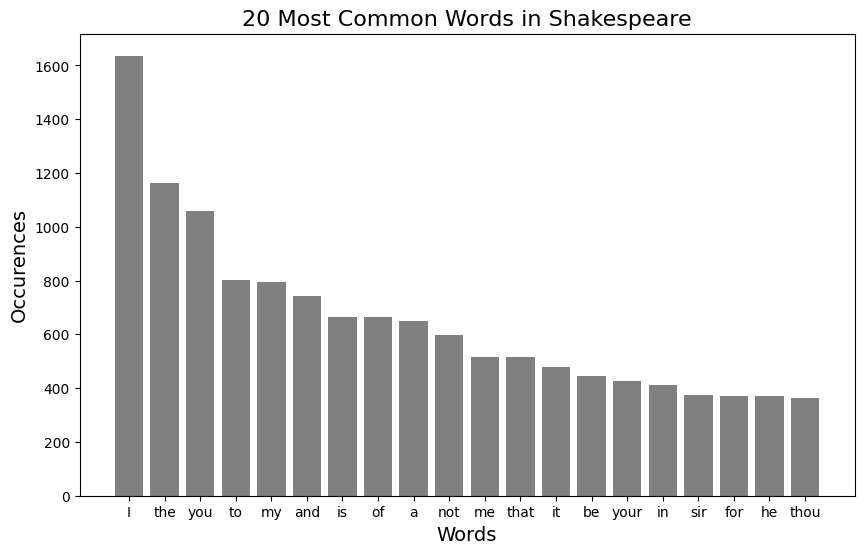

In [ ]:
top_20 = sorted(shakespeare_words.items(), key=lambda item: item[1], reverse=True)[:20]

keys, values = zip(*top_20)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='grey')

# Add titles and labels
plt.title('20 Most Common Words in Shakespeare', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Occurences', fontsize=14)

# Display the graph
plt.show()

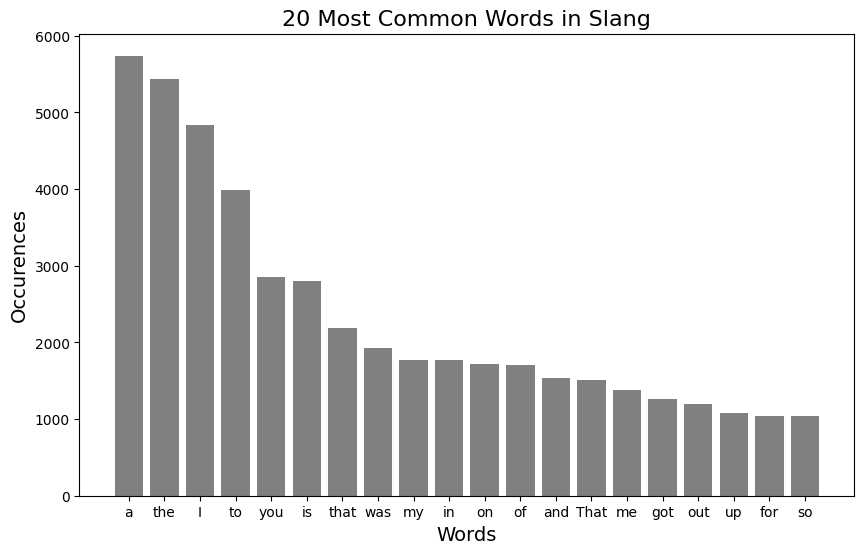

In [ ]:
top_20 = sorted(slang_words.items(), key=lambda item: item[1], reverse=True)[:20]

keys, values = zip(*top_20)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='grey')

# Add titles and labels
plt.title('20 Most Common Words in Slang', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Occurences', fontsize=14)

# Display the graph
plt.show()

In [ ]:
overlapping = shakespeare_set & slang_set

shakespeare_exclusive = shakespeare_set - slang_set;
slang_exclusive = slang_set - shakespeare_set

print(shakespeare_exclusive)
print(slang_exclusive)

print(f"Num overlapping: {len(overlapping)}")
print(f"Num Exclusive to Shakespeare: {len(shakespeare_exclusive)}")
print(f"Num Exclusive to Slang: {len(slang_exclusive)}")
print(f"Total: {len(overlapping) + len(shakespeare_exclusive) + len(slang_exclusive)}")


slang_exclusive_words = {key: val for key, val in slang_words.items() if key in slang_exclusive}
shakespeare_exclusive_words = {key: val for key, val in shakespeare_words.items() if key in shakespeare_exclusive}


{'contention', 'Forbids', 'threefold', 'Strives', 'Dry', 'Said', 'embracements', 'dearth', 'Taken', 'Barbary', 'Measureless', 'notched', 'shares', 'curdied', 'slewest', 'Disbursed', 'Ascend', 'manors', 'fortify', 'Sleeping', 'furrow', 'Ladders', 'Anselme', 'agrees', 'Capulet', 'perjury', 'worthiness', 'boughs', 'resolute', 'bides', 'prophesy', 'purged', 'opposer', 'visitors', 'pardonne', 'coactive', 'safest', 'stigmatic', 'Irons', 'glues', 'Hidest', 'propagate', 'heirs', 'bents', 'inexorable', 'soars', 'Anointed', 'Rode', 'fled', 'Mortal', 'Tabours', 'rounds', 'dissolved', 'Lies', 'aery', 'meekness', 'consult', 'angelical', 'measures', 'Corn', 'closure', 'charters', 'Ransoming', 'playfellow', 'restorative', 'sift', 'scotched', 'Cover', 'thriftless', 'mockery', 'nettles', 'pander', 'importunate', 'annoy', 'worships', 'foe', 'eclipsed', 'mammocked', 'gazed', 'Hew', 'shrunk', 'weeping', 'Dared', 'liveth', 'Lusty', 'overgo', 'engross', 'physical', 'drooping', 'lantern', 'foxes', 'westward'

In [ ]:
from random import sample
rand_prompt = sample(overlapping, 20)
print("assure" in overlapping)


True


<ipython-input-73-5b132051d495>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  rand_prompt = sample(overlapping, 10)


In [ ]:
import json

good_prompts = [
    "The lustful man and his mistress",
  "Joy rung out in the hood, replied the",
  "I assure you, the huge stupid",
  "Hugh continued saving the",
  "The walls cry looking",
  "Fortune ceases to",
  "George burned the sty next to the",
  "Promise the dogs are not",
  "Bran saved the temple",
  "We puff next to the devilish rat",
  "My crew should vent",
]

results = []
for prompt in good_prompts:
  results.append({"src": prompt, "trg": "Anything you want"})

with open("output.jsonl", "w") as file:
    for record in results:
        file.write(json.dumps(record) + "\n")

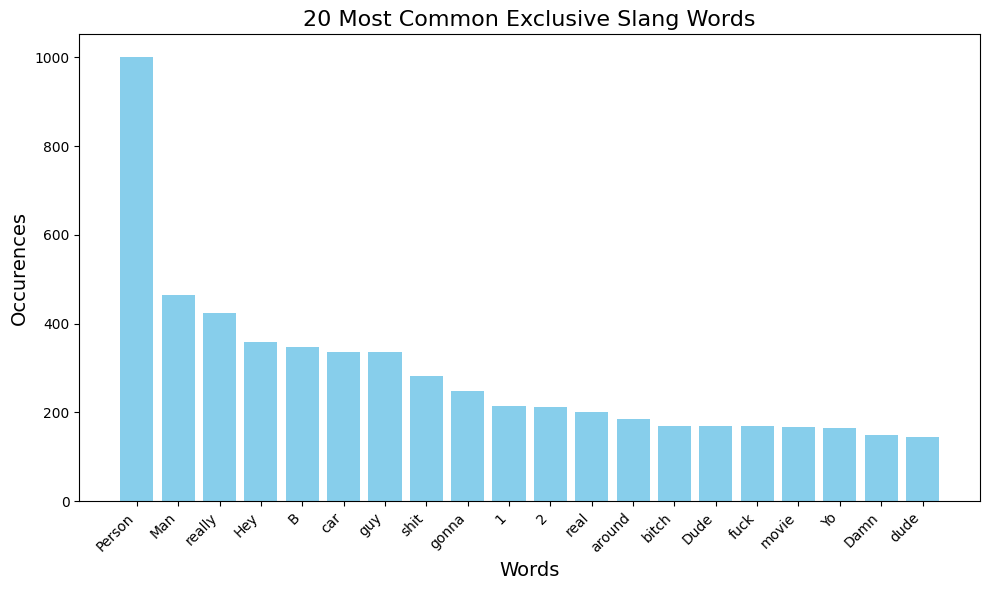

In [ ]:
top_20 = sorted(slang_exclusive_words.items(), key=lambda item: item[1], reverse=True)[:20]

keys, values = zip(*top_20)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

# Add titles and labels
plt.title('20 Most Common Exclusive Slang Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Occurences', fontsize=14)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the graph
plt.show()

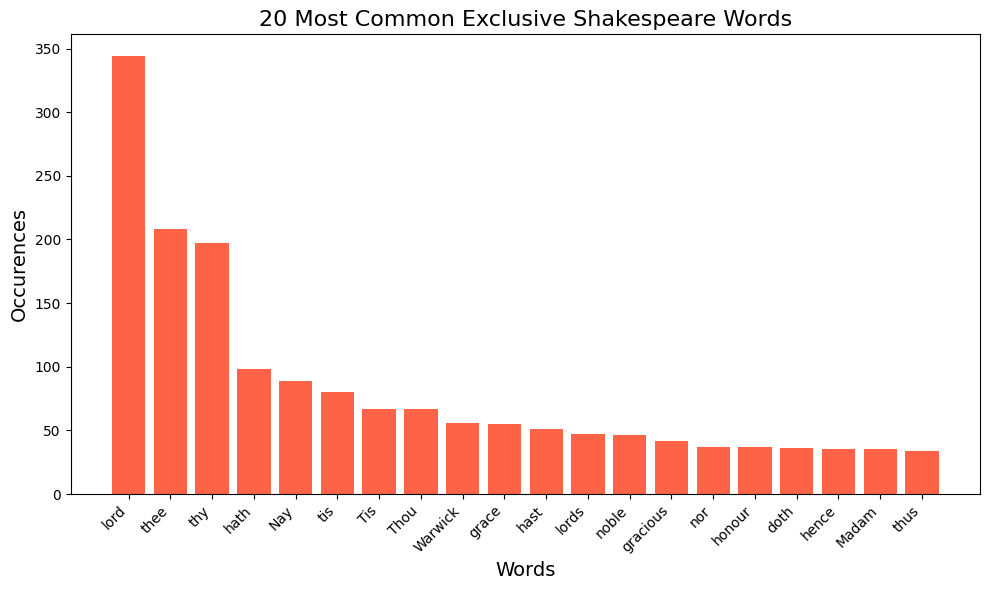

In [ ]:
top_20 = sorted(shakespeare_exclusive_words.items(), key=lambda item: item[1], reverse=True)[:20]

keys, values = zip(*top_20)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='tomato')

# Add titles and labels
plt.title('20 Most Common Exclusive Shakespeare Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Occurences', fontsize=14)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the graph
plt.show()

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import datasets
import json

dataset = datasets.load_dataset("chaseharmon/6.7960_FINAL")

NUM_SHAKESPEARE = 7097

shake_speare_data = dataset['train'][:NUM_SHAKESPEARE]

output_file = "shakespeare_data.jsonl"

# Open the file in write mode
with open(output_file, 'w') as f:
    for i in range(NUM_SHAKESPEARE):
        # Prepare the data in dictionary format for each entry
        entry = {
            "src": shake_speare_data['src'][i],
            "trg": shake_speare_data['trg'][i]
        }
        # Write the entry as a JSON object on a new line
        json.dump(entry, f)
        f.write("\n")  # Newline character to separate entries

print(f"JSON Lines file saved as {output_file}")


Repo card metadata block was not found. Setting CardData to empty.


JSON Lines file saved as shakespeare_data.jsonl


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['src', 'trg'],
        num_rows: 27590
    })
})

In [ ]:
slang_data = dataset['train'][NUM_SHAKESPEARE:]

output_file = "slang_data.jsonl"

# Open the file in write mode
with open(output_file, 'w') as f:
    for i in range(dataset['train'].num_rows - NUM_SHAKESPEARE):
        # Prepare the data in dictionary format for each entry
        entry = {
            "src": slang_data['src'][i],
            "trg": slang_data['trg'][i]
        }
        # Write the entry as a JSON object on a new line
        json.dump(entry, f)
        f.write("\n")  # Newline character to separate entries

# print(f"JSON Lines file saved as {output_file}")

In [ ]:
import json
output_file_path = "train.jsonl"

# Define the path to the train.jsonl file
file_path = 'train1.jsonl'

# Open the file and iterate through each line
with open(file_path, 'r', encoding='utf-8') as file:
  with open(output_file_path, 'w', encoding='utf-8') as outfile:
    for line in file:
        try:
            # Parse the JSON object from the line
            data = json.loads(line.strip())
            if data['src'] == "" or data['trg'] == "":
              continue
            else:
              outfile.write(json.dumps(data) + '\n')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

In [ ]:
newover = {'crimson',
 'limb',
 'wretched',
 'beam',
 'minds',
 'much',
 'spun',
 'maintain',
 'marks',
 'easily',
 'speaks',
 'open',
 'drawer',
 'suburbs',
 'familiar',
 'bowling',
 'barn',
 'mine',
 'bite',
 'ginger',
 'fisting',
 'border',
 'bridge',
 'annual',
 'wrecked',
 'goodness',
 'forgetting',
 'served',
 'wing',
 'stands',
 'kitchen',
 'hook',
 'grief',
 'morning',
 'bathed',
 'taking',
 'thoughts',
 'darts',
 'sun',
 'monday',
 'constable',
 'frail',
 'william',
 'cracking',
 'smells',
 'address',
 'turning',
 'aim',
 'toys',
 'means',
 'fact',
 'something',
 'degenerate',
 'flower',
 'design',
 'start',
 'messenger',
 'brace',
 'mill',
 'amazon',
 'quote',
 'cost',
 'taught',
 'walter',
 'supper',
 'acting',
 'home',
 'withdrawing',
 'cover',
 'forehead',
 'green',
 'steerage',
 'luck',
 'miserable',
 'print',
 'precious',
 'chair',
 'stole',
 'thousand',
 'sent',
 'dinner',
 'ill',
 'force',
 'sat',
 'chosen',
 'sea',
 'cutting',
 'tower',
 'offering',
 'midnight',
 'desired',
 'we',
 'mate',
 'gap',
 'turn',
 'monster',
 'scope',
 'shadow',
 'funeral',
 'recommend',
 'wait',
 'leaving',
 'kindness',
 'entire',
 'dough',
 'given',
 'trust',
 'flea',
 'while',
 'full',
 'feeding',
 'arrive',
 'use',
 'rest',
 'absolutely',
 'suspected',
 'won',
 'attempts',
 'cherry',
 'governor',
 'sport',
 'such',
 'moral',
 'violation',
 'major',
 'anthony',
 'points',
 'answering',
 'eye',
 'beg',
 'manner',
 'looker',
 'going',
 'hard',
 'paint',
 'plain',
 'fourth',
 'jest',
 'fortune',
 'sow',
 'lost',
 'brothers',
 'dress',
 'rod',
 'sand',
 'grandmother',
 'ear',
 'spice',
 'burning',
 'suit',
 'shed',
 'question',
 'following',
 'resume',
 'thief',
 'necklace',
 'branch',
 'she',
 'freeze',
 'touching',
 'crush',
 'sigh',
 'condition',
 'lot',
 'engage',
 'sack',
 'bookish',
 'hate',
 'murder',
 'waist',
 'digging',
 'philosophy',
 'choose',
 'womb',
 'figured',
 'january',
 'puppet',
 'conceited',
 'here',
 'up',
 'purchase',
 'then',
 'hers',
 'sunshine',
 'boring',
 'back',
 'adventure',
 'wives',
 'everything',
 'stamped',
 'honey',
 'road',
 'opposition',
 'sits',
 'rush',
 'letters',
 'naughty',
 'standard',
 'wizard',
 'never',
 'be',
 'four',
 'leagues',
 'forgets',
 'allowed',
 'big',
 'london',
 'nursing',
 'half',
 'us',
 'war',
 'permitted',
 'fight',
 'staying',
 'strangeness',
 'penny',
 'tackle',
 'receive',
 'mistakes',
 'dew',
 'essay',
 'safe',
 'tails',
 'sauced',
 'villains',
 'seals',
 'fooling',
 'comedy',
 'clay',
 'searching',
 'you',
 'senator',
 'habits',
 'magic',
 'forgive',
 'anon',
 'conveniently',
 'scrape',
 'swallow',
 'biting',
 'peter',
 'cry',
 'because',
 'these',
 'warrior',
 'thinks',
 'glass',
 'supply',
 'savage',
 'defaced',
 'fisher',
 'arms',
 'voices',
 'graft',
 'knows',
 'sixth',
 'bleeding',
 'laid',
 'staring',
 'cheaper',
 'seduce',
 'summer',
 'manage',
 'trade',
 'seats',
 'graze',
 'head',
 'squared',
 'gorge',
 'operation',
 'learning',
 'approach',
 'forty',
 'dead',
 'fighter',
 'drag',
 'happiness',
 'chest',
 'release',
 'threatened',
 'of',
 'cast',
 'caught',
 'broad',
 'suggested',
 'person',
 'knowledge',
 'constant',
 'horses',
 'bout',
 'odds',
 'velvet',
 'naked',
 'ben',
 'calling',
 'doubly',
 'stolen',
 'understand',
 'raise',
 'issue',
 'spilling',
 'park',
 'rope',
 'enjoying',
 'touse',
 'right',
 'pour',
 'mayor',
 'submission',
 'highest',
 'writing',
 'course',
 'hands',
 'shape',
 'hundred',
 'worm',
 'mars',
 'walks',
 'unjustly',
 'switch',
 'allow',
 'break',
 'same',
 'fixed',
 'soldiers',
 'pawn',
 'crowd',
 'note',
 'speeding',
 'already',
 'proved',
 'produce',
 'saddle',
 'next',
 'subject',
 'brittle',
 'dig',
 'lent',
 'mildly',
 'hence',
 'apples',
 'latest',
 'dam',
 'belong',
 'front',
 'french',
 'generation',
 'spanish',
 'it',
 'paper',
 'herb',
 'spectacles',
 'thin',
 'reports',
 'nearest',
 'anna',
 'outside',
 'bidding',
 'christmas',
 'shrug',
 'books',
 'stroke',
 'shines',
 'die',
 'plucked',
 'target',
 'partake',
 'as',
 'bats',
 'agreed',
 'space',
 'rides',
 'dreams',
 'breeder',
 'blunt',
 'rid',
 'dub',
 'compound',
 'rocks',
 'visited',
 'beads',
 'either',
 'leave',
 'swords',
 'occupation',
 'card',
 'shooting',
 'joints',
 'brats',
 'beside',
 'most',
 'gregory',
 'allies',
 'passion',
 'cell',
 'services',
 'mouse',
 'suits',
 'remote',
 'physicians',
 'effect',
 'destroying',
 'fabric',
 'rubs',
 'sink',
 'stephen',
 'wears',
 'battalion',
 'creep',
 'miss',
 'dukes',
 'cross',
 'exercise',
 'me',
 'threats',
 'play',
 'steel',
 'been',
 'bell',
 'nip',
 'decree',
 'bar',
 'onion',
 'visage',
 'princess',
 'amounts',
 'agents',
 'might',
 'jugs',
 'excuse',
 'without',
 'bid',
 'brains',
 'words',
 'lawyers',
 'holla',
 'nature',
 'castle',
 'letting',
 'confession',
 'daring',
 'otherwise',
 'divorced',
 'news',
 'hoping',
 'held',
 'better',
 'broke',
 'pull',
 'bent',
 'walk',
 'share',
 'son',
 'peaches',
 'fish',
 'contain',
 'robbed',
 'crow',
 'ranks',
 'conversation',
 'spell',
 'matches',
 'jet',
 'complaint',
 'wings',
 'people',
 'north',
 'forward',
 'pretending',
 'songs',
 'others',
 'iron',
 'geese',
 'write',
 'fastest',
 'droop',
 'any',
 'depends',
 'add',
 'grounded',
 'teaching',
 'credit',
 'rare',
 'kiss',
 'spoons',
 'begin',
 'escaped',
 'fence',
 'relieve',
 'hunger',
 'brain',
 'tall',
 'dates',
 'stage',
 'painful',
 'rocky',
 'appears',
 'noon',
 'fondness',
 'bad',
 'against',
 'boy',
 'rover',
 'one',
 'those',
 'spread',
 'flint',
 'tires',
 'join',
 'hangs',
 'cooling',
 'cream',
 'unless',
 'excellent',
 'picking',
 'dealings',
 'heading',
 'knife',
 'shoot',
 'pain',
 'leet',
 'using',
 'opportunity',
 'dive',
 'instant',
 'hunt',
 'stranger',
 'yet',
 'foh',
 'immediate',
 'deck',
 'go',
 'asks',
 'puff',
 'possible',
 'strict',
 'whip',
 'bow',
 'europe',
 'bias',
 'night',
 'hoped',
 'weeks',
 'clout',
 'factor',
 'country',
 'pointing',
 'feel',
 'prisoner',
 'edge',
 'sunk',
 'season',
 'example',
 'working',
 'slay',
 'sure',
 'prisoners',
 'lamp',
 'trash',
 'humorous',
 'drove',
 'bruising',
 'god',
 'whoop',
 'herself',
 'clothes',
 'hates',
 'wicked',
 'confirmed',
 'playing',
 'directions',
 'judas',
 'heaven',
 'rave',
 'wishes',
 'band',
 'dries',
 'strong',
 'prepared',
 'bristol',
 'blows',
 'import',
 'washed',
 'cheek',
 'catching',
 'sermon',
 'named',
 'slug',
 'outcry',
 'con',
 'a',
 'pound',
 'cap',
 'thou',
 'listening',
 'million',
 'quit',
 'should',
 'tide',
 'lip',
 'admit',
 'conference',
 'being',
 'rag',
 'throwing',
 'punish',
 'scene',
 'meed',
 'butt',
 'wail',
 'victory',
 'pleasures',
 'moment',
 'affair',
 'spend',
 'dishes',
 'france',
 'perfect',
 'qualified',
 'notorious',
 'oil',
 'needle',
 'daily',
 'broken',
 'liquor',
 'getting',
 'terms',
 'bran',
 'sad',
 'desirous',
 'resolve',
 'cup',
 'thwarted',
 'talked',
 'nice',
 'theatre',
 'there',
 'affect',
 'fine',
 'fast',
 'festival',
 'pins',
 'female',
 'boon',
 'regiment',
 'trumpet',
 'driving',
 'smoke',
 'faded',
 'sufficiently',
 'race',
 'yoked',
 'simply',
 'ho',
 'jaunt',
 'sex',
 'disorderly',
 'mart',
 'backs',
 'miranda',
 'pinch',
 'friar',
 'therein',
 'house',
 'pass',
 'relief',
 'rage',
 'rear',
 'uncomfortable',
 'rank',
 'save',
 'tells',
 'became',
 'mid',
 'turned',
 'tables',
 'works',
 'carried',
 'brethren',
 'rely',
 'haggard',
 'killed',
 'gently',
 'rebate',
 'evil',
 'miles',
 'devil',
 'whelp',
 'quake',
 'worst',
 'wonder',
 'file',
 'winking',
 'continued',
 'tied',
 'beauty',
 'causes',
 'bread',
 'steward',
 'arm',
 'dialect',
 'hats',
 'blasting',
 'hag',
 'requested',
 'prophet',
 'anger',
 'sticks',
 'brick',
 'dial',
 'fresh',
 'vile',
 'skins',
 'saucy',
 'hounds',
 'distinguished',
 'abuse',
 'booties',
 'attach',
 'shock',
 'buy',
 'did',
 'hairy',
 'strange',
 'brags',
 'asleep',
 'jacks',
 'met',
 'rise',
 'well',
 'cement',
 'thinking',
 'mile',
 'down',
 'vain',
 'dreaded',
 'must',
 'watches',
 'name',
 'derived',
 'friendly',
 'skirts',
 'looking',
 'hop',
 'week',
 'degree',
 'shows',
 'beaten',
 'guest',
 'cage',
 'strings',
 'doit',
 'from',
 'taller',
 'store',
 'peep',
 'purse',
 'wink',
 'bars',
 'bury',
 'lend',
 'attempting',
 'where',
 'crossing',
 'greeting',
 'hairs',
 'am',
 'submit',
 'humble',
 'stalls',
 'ruffians',
 'smack',
 'want',
 'easy',
 'command',
 'division',
 'to',
 'motion',
 'bush',
 'unlucky',
 'format',
 'religion',
 'hole',
 'rusty',
 'rags',
 'babe',
 'climate',
 'boots',
 'religious',
 'good',
 'newborn',
 'aught',
 'title',
 'muddy',
 'prime',
 'cushion',
 'sauce',
 'whoa',
 'inquire',
 'frosts',
 'brown',
 'prunes',
 'loan',
 'caution',
 'range',
 'lovers',
 'lands',
 'attend',
 'let',
 'tore',
 'thick',
 'coat',
 'quest',
 'spider',
 'fifteen',
 'confidence',
 'whenever',
 'learnt',
 'worthy',
 'model',
 'christopher',
 'swallowing',
 'seeing',
 'planet',
 'laughed',
 'spot',
 'disguise',
 'hours',
 'ripe',
 'supposed',
 'account',
 'inferior',
 'hector',
 'comes',
 'crop',
 'at',
 'hunting',
 'pleasure',
 'spying',
 'form',
 'laying',
 'angels',
 'numbers',
 'received',
 'victor',
 'guess',
 'like',
 'far',
 'imagine',
 'whining',
 'is',
 'gold',
 'jolly',
 'creation',
 'matching',
 'spotted',
 'attending',
 'in',
 'great',
 'now',
 'beats',
 'chased',
 'niece',
 'steer',
 'interest',
 'swift',
 'strokes',
 'dropping',
 'ribs',
 'spilt',
 'fighting',
 'giant',
 'stock',
 'quietly',
 'button',
 'dogs',
 'two',
 'refused',
 'presented',
 'through',
 'company',
 'hooks',
 'sorted',
 'childhood',
 'verily',
 'prank',
 'guests',
 'says',
 'are',
 'sending',
 'under',
 'change',
 'brat',
 'mischief',
 'about',
 'sue',
 'article',
 'slippers',
 'worn',
 'excess',
 'wore',
 'inches',
 'bear',
 'herd',
 'fever',
 'resort',
 'percy',
 'fires',
 'mystery',
 'convenience',
 'owed',
 'contract',
 'hill',
 'cottage',
 'pursuing',
 'attire',
 'buzzed',
 'aptly',
 'retirement',
 'jacob',
 'knocking',
 'bare',
 'chose',
 'greyhound',
 'speaking',
 'hurts',
 'staff',
 'arrested',
 'award',
 'dust',
 'witch',
 'kind',
 'truth',
 'fifth',
 'inventory',
 'slept',
 'walked',
 'eats',
 'conduct',
 'accidentally',
 'calm',
 'girl',
 'persuasion',
 'dine',
 'belike',
 'flame',
 'mustard',
 'coming',
 'filthy',
 'dozen',
 'slippery',
 'wash',
 'penelope',
 'pearl',
 'slave',
 'past',
 'conditions',
 'ash',
 'certain',
 'line',
 'list',
 'cannot',
 'pregnant',
 'edges',
 'followed',
 'mangle',
 'lick',
 'queen',
 'fort',
 'free',
 'o',
 'audience',
 'built',
 'breather',
 'glued',
 'g',
 'desert',
 'trophy',
 'greasy',
 'sometimes',
 'sounds',
 'hour',
 'replied',
 'thrown',
 'parties',
 'lecture',
 'prizes',
 'sober',
 'strike',
 'can',
 'discretion',
 'tub',
 'rap',
 'bucket',
 'freely',
 'zounds',
 'bright',
 'ship',
 'proceeds',
 'blew',
 ...}

In [ ]:
print(len(newover))

1001
